In [1]:
from sklearn.datasets import make_regression
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=42)

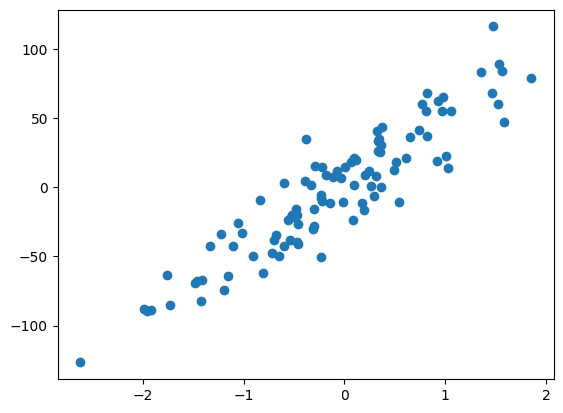

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[46.747264]
0.19844442845175525


In [6]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr, X, y, scoring='r2', cv=10))

np.float64(0.8016058585014069)

In [7]:
y_pred = lr.predict(X_test)
from sklearn.metrics import  r2_score
r2 = r2_score(y_test, y_pred)

print(f'R^2 Score: {r2}')


R^2 Score: 0.8019015156159199


In [8]:
class GDregressor:
    def __init__ (self, learning_rate, epochs=1000):
        self.m = 0
        self.b = 0
        self.epochs = epochs
        self.learning_rate = learning_rate

    def fit(self, X, y):
         for i in range(self.epochs):
             loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
             loss_slope_m = -2 * np.sum(X.ravel() * (y - self.m * X.ravel() - self.b))
        
             self.b = self.b - (self.learning_rate * loss_slope_b)
             self.m = self.m - (self.learning_rate * loss_slope_m)
             print(f"m: {self.m}, b: {self.b}")

    

    def predict(self, X):
        return self.m * X + self.b   

In [9]:
gd = GDregressor(learning_rate=0.01, epochs=1000)



In [10]:

gd.fit(X_train,y_train)

m: 62.364686267347444, b: -9.305278030695403
m: 39.559802612761, b: 9.115479117872544
m: 50.990292337572185, b: -6.631294527406995
m: 43.92015464237355, b: 5.169702916428973
m: 48.717540115541134, b: -3.3662629499366012
m: 45.35352369763971, b: 2.74284449708707
m: 47.737862917995926, b: -1.6150930231326974
m: 46.042145612245015, b: 1.490478822791487
m: 47.24940909813304, b: -0.7219227886999673
m: 46.389612606884505, b: 0.854029875759474
m: 47.00201180586871, b: -0.2685283443934927
m: 46.565809722735786, b: 0.5310671919538691
m: 46.87651260930849, b: -0.03848106731574974
m: 46.65520098475401, b: 0.36720517899734373
m: 46.81283995792445, b: 0.07823707325474372
m: 46.70055460618161, b: 0.28406746348782674
m: 46.78053483690061, b: 0.13745561438369988
m: 46.72356536224154, b: 0.24188642306338734
m: 46.76414440339527, b: 0.1675009362338265
m: 46.73524017712828, b: 0.22048530661193522
m: 46.7558284974315, b: 0.18274483298944316
m: 46.741163550889915, b: 0.20962716336276413
m: 46.7516093111034

In [11]:
y_pred= gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.80190151561592

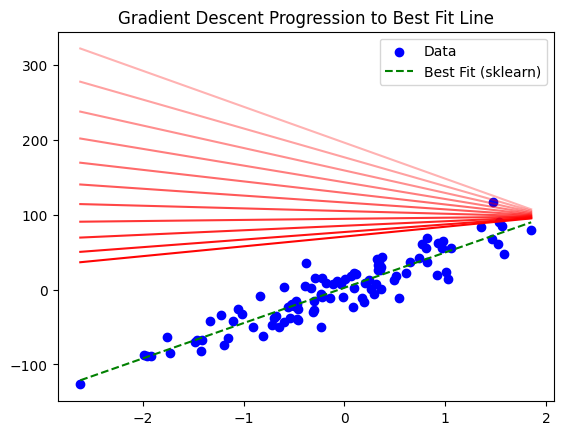

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Best-fit line using sklearn
lr = LinearRegression().fit(X, y)
best_m, best_b = lr.coef_[0], lr.intercept_

class GDregressor:
    def __init__(self, learning_rate=0.01, epochs=50):
        self.m = -50
        self.b = 200
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.history = []

    def fit(self, X, y):
        X = X.ravel()
        n = len(X)
        for _ in range(self.epochs):
            y_pred = self.m * X + self.b
            dm = (-2/n) * np.sum(X * (y - y_pred))
            db = (-2/n) * np.sum(y - y_pred)
            self.m -= self.learning_rate * dm
            self.b -= self.learning_rate * db
            self.history.append((self.m, self.b))

# Train GD
gd = GDregressor(learning_rate=0.01, epochs=50)
gd.fit(X, y)

# Plot
x_vals = np.linspace(X.min(), X.max(), 100)
plt.scatter(X, y, color='blue', label='Data')

# Plot intermediate GD lines (every few epochs)
for i, (m, b) in enumerate(gd.history):
    if i % 5 == 0 or i == len(gd.history)-1:  # every 5 epochs + final
        plt.plot(x_vals, m * x_vals + b, color='red', alpha=0.3 + 0.7*(i/len(gd.history)))

# Plot sklearn best-fit
plt.plot(x_vals, best_m * x_vals + best_b, 'g--', label='Best Fit (sklearn)')

plt.title("Gradient Descent Progression to Best Fit Line")
plt.legend()
plt.show()


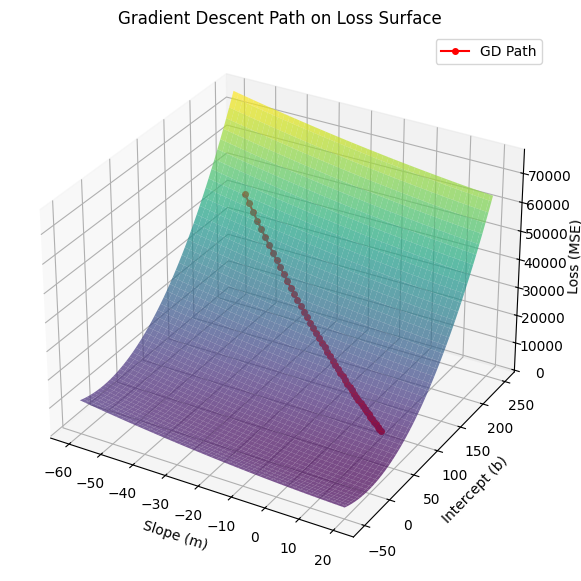

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# ==== Generate data ====
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X = X.ravel()

# ==== GD Regressor ====
class GDregressor:
    def __init__(self, learning_rate=0.01, epochs=50):
        self.m = -50
        self.b = 200
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.history = []

    def fit(self, X, y):
        n = len(X)
        for _ in range(self.epochs):
            y_pred = self.m * X + self.b
            dm = (-2/n) * np.sum(X * (y - y_pred))
            db = (-2/n) * np.sum(y - y_pred)
            self.m -= self.learning_rate * dm
            self.b -= self.learning_rate * db
            loss = np.mean((y - y_pred)**2)  # MSE
            self.history.append((self.m, self.b, loss))

# ==== Train GD ====
gd = GDregressor(learning_rate=0.01, epochs=50)
gd.fit(X, y)

# ==== Create Loss Surface ====
m_vals = np.linspace(-60, 20, 100)
b_vals = np.linspace(-50, 250, 100)
M, B = np.meshgrid(m_vals, b_vals)

# Compute MSE for each (m, b)
Loss = np.zeros_like(M)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        y_pred = M[i, j] * X + B[i, j]
        Loss[i, j] = np.mean((y - y_pred)**2)

# ==== Plot 3D surface ====
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Loss surface
ax.plot_surface(M, B, Loss, cmap='viridis', alpha=0.7)

# GD path (red line)
ms = [m for m, b, loss in gd.history]
bs = [b for m, b, loss in gd.history]
losses = [loss for m, b, loss in gd.history]
ax.plot(ms, bs, losses, color='red', marker='o', markersize=4, label='GD Path')

# Labels
ax.set_xlabel('Slope (m)')
ax.set_ylabel('Intercept (b)')
ax.set_zlabel('Loss (MSE)')
ax.set_title('Gradient Descent Path on Loss Surface')
ax.legend()

plt.show()


* 3D bowl-shaped surface representing the MSE for all possible (m, b) values.

* red dotted path showing how GD starts far from the bottom and walks downhill to the minimum loss.



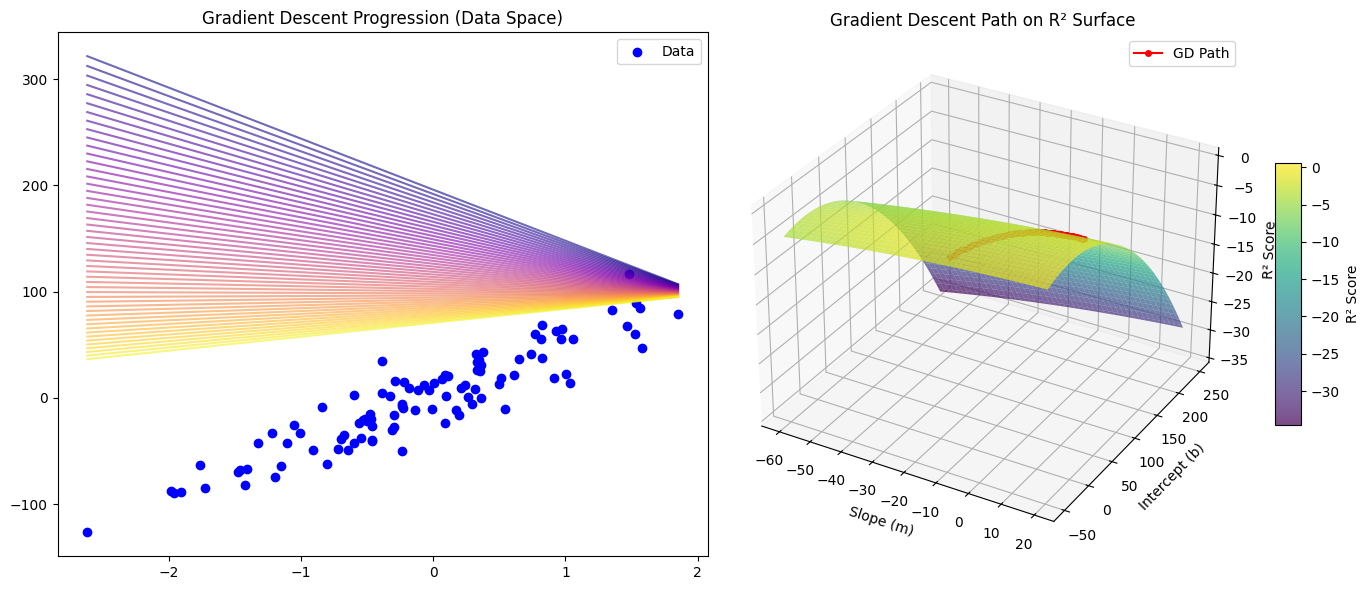

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

# ==== Generate data ====
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X = X.ravel()

# ==== GD Regressor ====
class GDregressor:
    def __init__(self, learning_rate=0.01, epochs=50):
        self.m = -50
        self.b = 200
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.history = []

    def fit(self, X, y):
        n = len(X)
        for _ in range(self.epochs):
            y_pred = self.m * X + self.b
            dm = (-2/n) * np.sum(X * (y - y_pred))
            db = (-2/n) * np.sum(y - y_pred)
            self.m -= self.learning_rate * dm
            self.b -= self.learning_rate * db
            score = r2_score(y, y_pred)  # store R² score
            self.history.append((self.m, self.b, score))

# ==== Train GD ====
gd = GDregressor(learning_rate=0.01, epochs=50)
gd.fit(X, y)

# ==== Create R² Surface ====
m_vals = np.linspace(-60, 20, 100)
b_vals = np.linspace(-50, 250, 100)
M, B = np.meshgrid(m_vals, b_vals)

R2_surface = np.zeros_like(M)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        y_pred = M[i, j] * X + B[i, j]
        R2_surface[i, j] = r2_score(y, y_pred)

# ==== Create figure with two subplots ====
fig = plt.figure(figsize=(14, 6))

# ---- Left: Data progression ----
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(X, y, color='blue', label='Data')

x_vals = np.linspace(X.min(), X.max(), 100)
epochs_total = len(gd.history)

for i, (m, b, score) in enumerate(gd.history):
    color_ratio = i / epochs_total
    ax1.plot(x_vals, m * x_vals + b, color=plt.cm.plasma(color_ratio), alpha=0.6)

ax1.set_title("Gradient Descent Progression (Data Space)")
ax1.legend()

# ---- Right: R² surface ----
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax2.plot_surface(M, B, R2_surface, cmap='viridis', alpha=0.7)

ms = [m for m, b, score in gd.history]
bs = [b for m, b, score in gd.history]
scores = [score for m, b, score in gd.history]

ax2.plot(ms, bs, scores, color='red', marker='o', markersize=4, label='GD Path')

ax2.set_xlabel('Slope (m)')
ax2.set_ylabel('Intercept (b)')
ax2.set_zlabel('R² Score')
ax2.set_title("Gradient Descent Path on R² Surface")
ax2.legend()

fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=10, label='R² Score')

plt.tight_layout()
plt.show()


* Left panel:

Blue points (data).

Multiple GD lines fading from early (light) to late (dark).



* Right panel:

3D “mountain” where the height = R² score.

Red path climbing toward the peak.

